# Newton法

## 1. 凸関数に対するNewton法

/Users/ryotaroshima/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


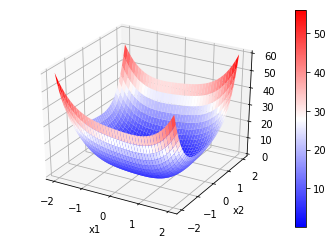

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

N = 41
x1 = np.linspace(-2, 2, N)
x2 = np.linspace(-2, 2, N)

X1, X2 = np.meshgrid(x1, x2)
Y = X1**4 + X1**2 + X1*X2 + X2**2 + 2*X2**4

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
fig.show()

In [2]:
def f(x0, x1):
    y = x0**4 + x0**2 + x0*x1 + x1**2 + 2*x1**4
    dydx = np.array([4*x0**3 + 2*x0 + x1,
                     x0 + 2*x1 + 8*x1**3])
    H = np.array([[12*x0+2, 1],
                  [1, 2+24*x1**2]])
    return y, dydx, H

In [3]:
# initial value
x0, x1 = 2, 2

# newton's method
print("i    x1          x2           f(x)")
for i in range(10):    
    y, dydx, H = f(x0, x1)
    print(f"{i:3d} [{x0:10.3e}, {x1:10.3e}], {y:10.3e}")
    d = - np.dot(np.linalg.inv(H), dydx)
    x0 += d[0]
    x1 += d[1]


i    x1          x2           f(x)
  0 [ 2.000e+00,  2.000e+00],  6.000e+01
  1 [ 5.654e-01,  1.300e+00],  8.566e+00
  2 [ 2.610e-01,  8.201e-01],  1.864e+00
  3 [ 5.120e-02,  4.836e-01],  3.707e-01
  4 [-8.328e-02,  2.486e-01],  5.574e-02
  5 [ 2.092e-02,  6.459e-02],  5.997e-03
  6 [ 1.783e-03,  1.204e-03],  6.775e-06
  7 [ 2.504e-05, -1.251e-05],  4.703e-10
  8 [ 5.015e-09, -2.508e-09],  1.887e-17
  9 [ 2.012e-16, -1.006e-16],  3.037e-32
